Using CPU. Note: This module is much faster with a GPU.


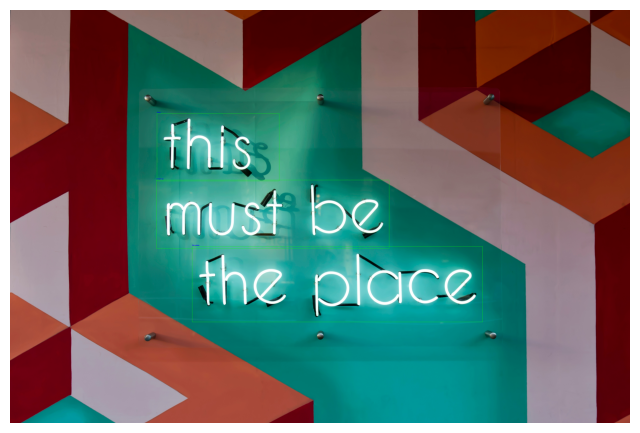

In [4]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Load the image
img1 = cv2.imread('p1.jpg')
if img1 is None:
    print("Image not loaded, check the path.")
    exit()

# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'], gpu=False)

# Detect text in the image
results = reader.readtext(img1)

# Draw bounding boxes and text
for (bbox, text, prob) in results:
    if prob >= 0.25:  # Only consider results with confidence above 25%
        top_left = tuple([int(val) for val in bbox[0]])
        bottom_right = tuple([int(val) for val in bbox[2]])

        # Draw the bounding box
        cv2.rectangle(img1, top_left, bottom_right, (0, 255, 0), 2)

        # Calculate text position (above the bounding box)
        text_position = (top_left[0], top_left[1] - 10 if top_left[1] > 10 else bottom_right[1] + 20)

        # Draw the text
        cv2.putText(img1, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Use matplotlib to display the image
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis
plt.show()
